## 1. Error Function

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
from scipy.misc import derivative

$$ erf(x) = \frac{2}{\sqrt{\pi}} \int_0^x e^{-t^2} dt. $$,
* 위와 같이 주어지는 에러함수를 수치적분을 이용하여 구하고 그래프를 그려라. (어떤 방법을 이용하든 관계없음)

$$
    \begin{align}
    erf(x) &= \frac{2}{\pi} \sum_{n=0}^{\infty} \frac{ (-1)^n x^{2n+1}} { (2n+1) n!} \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ (1)  \\
    &= \frac{2}{\pi} \left( x - \frac{x^3}{3} + \frac{x^5}{10} - \frac{x^7}{42} + \cdots \right) (2)
    \end{align}
    $$
* 에러함수를 테일러 전개하면 위와 같이 주어진다. 위의 전개식과 적분결과를 그래프로 그리고 비교하여라.

0.8795880713775148


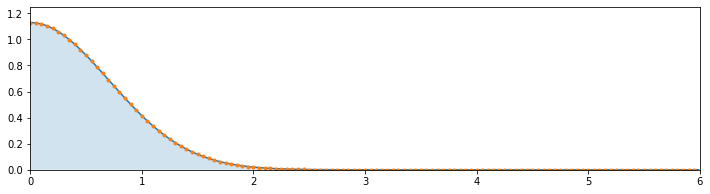

In [2]:
def erf(t):
    return (2/(np.pi)**0.5)*np.exp(-t**2)

def integ(erf,a,b,dt):
    s, t = 0, a
    while(t<b):
        s += 0.5*dt*(erf(t+dt)+erf(t))
        t += dt
    return s
print(integ(erf,0,1,0.1))

x = np.arange(0,6,0.01)
x1 = np.arange(0,6,0.05)
plt.figure(figsize=(12,3));
plt.xlim(0,6);plt.ylim(0,1.25)
plt.plot(x,erf(x))
plt.plot(x1,erf(x1),'.')
plt.fill_between(x1,erf(x1),alpha=0.2)

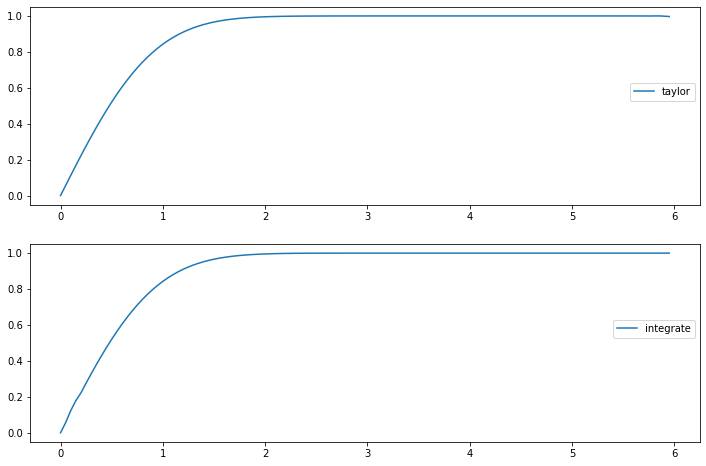

In [3]:
def facto(n):
    f = 1.0
    for i in range(1,n+1):
        f *= i
    return f

def t(n):
    i, f = 0, 0
    while (i<=n):
        f = f + (((-1)**i)*(x**(2*i+1)))/((2*i+1)*facto(i))
        i = i+1
    return f

def T(n):
    return 2*np.pi**(-0.5)*t(n)
plt.figure(figsize=(12, 8))
x=np.arange(0,6,0.05)
plt.subplot(211)
plt.plot(x,T(100),label = 'taylor')
plt.legend(loc='lower right', bbox_to_anchor=(1, 0.5))

def erf(t):
    return (2/(np.pi)**0.5)*np.exp(-t**2)

def integ(erf,a,b,dt):
    s, t = 0, a
    while(t<b):
        s += 0.5*dt*(erf(t+dt)+erf(t))
        t += dt
    return s

x=np.arange(0,6,0.05)
y=[integ(erf,0,b,0.01) for b in x]
plt.subplot(212)
plt.plot(x,y,label = 'integrate')
plt.legend(loc='lower right', bbox_to_anchor=(1, 0.5))

## 2. (Integration) Trigonometric Function
* sin, cos함수를 trapezoidal 방법을 이용하여 직접 적분하고 그래프를 그려라.
* sin, cos함수를 scipy.integrate 함수를 이용하여 적분하고 그래프를 그려라.

0.03980177656360743
-0.27931947953647995
(0.03982971334963404, 4.407690371583285e-14)
(-0.27941549819892586, 4.1227842569469204e-14)


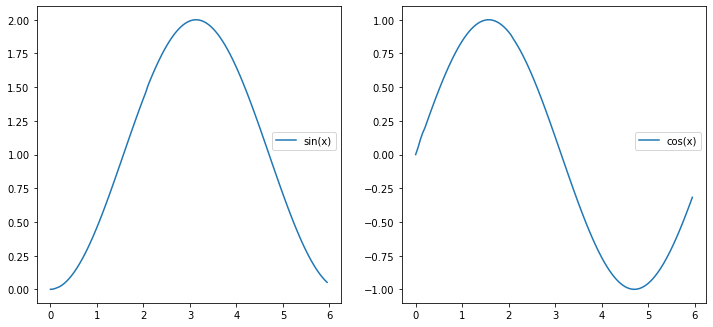

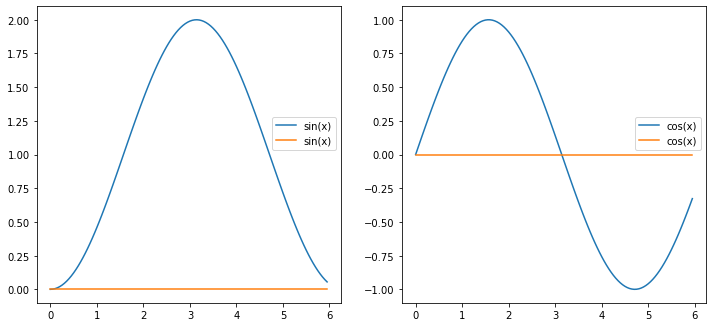

In [4]:
xdata = np.arange(0,6,0.01)

def sin(x):
    return np.sin(x)

def cos(x):
    return np.cos(x)

def trapez(f,a,b,dx):
    s, x = 0, a
    while(x<b):
        s += dx*(0.5*f(x)+0.5*f(x+dx))
        x = x + dx
    return s

plt.figure(figsize=(12,12))
print(trapez(sin,0,6,0.0001))
print(trapez(cos,0,6,0.0001))

x=np.arange(0,6,0.05)
y1=[trapez(sin,0,b,0.01) for b in x]
y2=[trapez(cos,0,b,0.01) for b in x]

plt.subplot(2,2,1)
plt.plot(x,y1,label='sin(x)')
plt.legend(loc='lower right', bbox_to_anchor=(1, 0.5))

plt.subplot(2,2,2)
plt.plot(x,y2,label='cos(x)')
plt.legend(loc='lower right', bbox_to_anchor=(1, 0.5))

plt.figure(figsize=(12,12))
print(integrate.quad(sin,0,6))
print(integrate.quad(cos,0,6))

x=np.arange(0,6,0.05)
y3=[integrate.quad(sin,0,b) for b in x]
y4=[integrate.quad(cos,0,b) for b in x]

plt.subplot(2,2,3)
plt.plot(x,y3,label='sin(x)')
plt.legend(loc='lower right', bbox_to_anchor=(1, 0.5))

plt.subplot(2,2,4)
plt.plot(x,y4,label='cos(x)')
plt.legend(loc='lower right', bbox_to_anchor=(1, 0.5))

## 3. (Differentiation) Trigonometric Function
* sin, cos함수의 도함수를 finite difference 방법을 이용하여 구현하고 그래프를 그려라.
* sin, cos함수의 도함수를 scipy.misc.derivative 함수를 이용하여 구하고 그래프를 그려라.

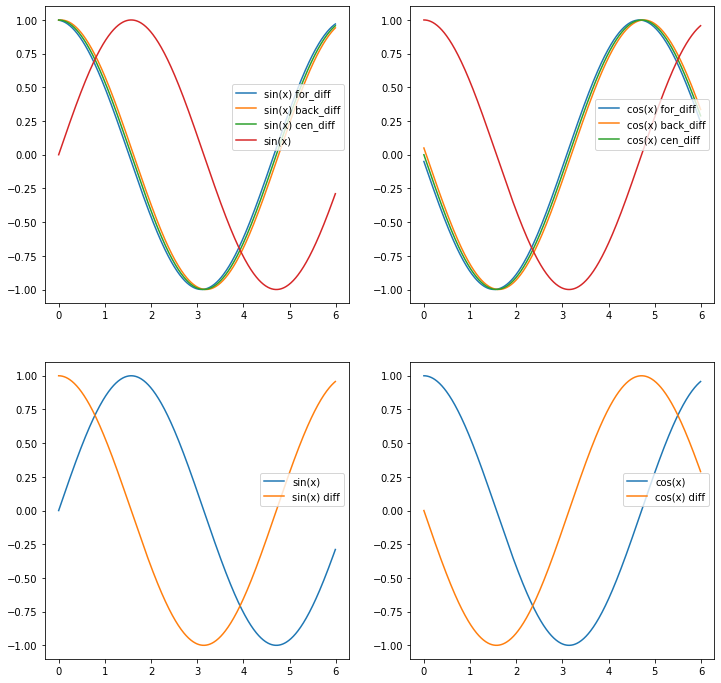

In [5]:
xdata = np.arange(0,6,0.01)

def sin(x):
    return np.sin(x)

def cos(x):
    return np.cos(x)

def trapez(f,a,b,n):
    s, x, dx = 0, a, (b-a)/n
    while(x<b):
        s += dx*(0.5*f(x)+0.5*f(x+dx))
        x = x + dx
    return s

def for_diff(f,x,dx):
    return (f(x+dx)-f(x))/dx
def back_diff(f,x,dx):
    return (f(x)-f(x-dx))/dx
def cen_diff(f,x,dx):
    return (f(x+dx/2)-f(x-dx/2))/dx

dx=0.1
diff1=[for_diff(sin,i,dx) for i in xdata]
diff2=[back_diff(sin,i,dx) for i in xdata]
diff3=[cen_diff(sin,i,dx) for i in xdata]
diff4=[for_diff(cos,i,dx) for i in xdata]
diff5=[back_diff(cos,i,dx) for i in xdata]
diff6=[cen_diff(cos,i,dx) for i in xdata]

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.plot(xdata,diff1,label='sin(x) for_diff')
plt.plot(xdata,diff2,label='sin(x) back_diff')
plt.plot(xdata,diff3,label='sin(x) cen_diff')
plt.plot(xdata,sin(xdata), label='sin(x)')
plt.legend(loc='lower right', bbox_to_anchor=(1, 0.5))

plt.subplot(2,2,2)
plt.plot(xdata,diff4,label='cos(x) for_diff')
plt.plot(xdata,diff5,label='cos(x) back_diff')
plt.plot(xdata,diff6,label='cos(x) cen_diff')
plt.plot(xdata,cos(xdata))
plt.legend(loc='lower right', bbox_to_anchor=(1, 0.5))

plt.subplot(2,2,3)
derivative(np.sin,np.pi,dx=0.01)
plt.plot(xdata,[derivative(np.sin,i,dx=0.01,n=0) for i in xdata],label='sin(x)')
plt.plot(xdata,[derivative(np.sin,i,dx=0.01) for i in xdata],label='sin(x) diff')
plt.legend(loc='lower right', bbox_to_anchor=(1, 0.5))

plt.subplot(2,2,4)
derivative(np.cos,np.pi,dx=0.01)
plt.plot(xdata,[derivative(np.cos,i,dx=0.01,n=0) for i in xdata],label='cos(x)')
plt.plot(xdata,[derivative(np.cos,i,dx=0.01) for i in xdata],label='cos(x) diff')
plt.legend(loc='lower right', bbox_to_anchor=(1, 0.5))